## Exercice for Graph II

Your task:

Create a Graph where you pass in a single list of integers along with a name and an operation. If the operation is a "+", you add the elements and if it is a "*". you multiply the elements, all within the same node.

    - Input: {"name": "Jack Sparrow", "values": [1,2,3,4] , "operation": "*"}

    - Output: "Hi Jack Sparrow, your answer is: 24"

Hint: You need an if-statement in your node!

In [2]:
from typing import Dict, TypedDict, List, Union
from langgraph.graph import StateGraph 

In [3]:
class AgentState(TypedDict):
    values: List[int]
    name : str
    operation : str
    result : str

In [4]:
def square(x: Union[int, float]) -> float:
    return x * x

In [5]:
def process_op_values(state: AgentState) -> AgentState:
    """ This function handles multiple different inputs"""
    
    if state['operation'] == "+":
        state['result'] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    elif state['operation'] == "*":
        # Calculate the product of all values in the list
        product = 1
        for value in state['values']:
            product *= value
        state['result'] = f"Hi {state['name']}, your answer is: {product}"
        
    return state

In [6]:
graph = StateGraph(AgentState)

graph.add_node("processor_op", process_op_values)
graph.set_entry_point("processor_op")
graph.set_finish_point("processor_op")
app = graph.compile()

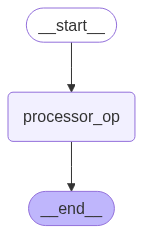

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
answer = app.invoke({'values':[1,2,3,4], "name": "Steve", "operation" : "*"})
print(answer['result'])

Hi Steve, your answer is: 24
